<a href="https://colab.research.google.com/github/silviutroscot/Machine-Learning-Playground/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic regression

## Python implementation of the second assignment from Andrew NG's [Machine Learning](https://www.coursera.org/learn/machine-learning) course.

### This notebook contains generic logistic regression functions, applied on two use cases:
- Binary classification, where we want to predict if a student is admitted, based on their result of two exams
- Binary clasification w

In [2]:
# Load the Drive helper and mount
# This should be runned only once, at the initialization of the notebook
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.seterr(over='raise')

# read dataset from Google drive
with open("drive/My Drive/Datasets/exams_results_admission_classification.txt", 'r') as dataset:
  data = pd.read_csv(dataset, header=None)
  data.columns = (["first_exam_result", "second_exam_result", "admited"])
  data.insert(0, 'feature_zero', 1)

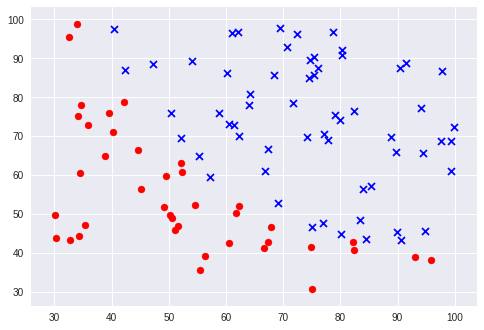

In [4]:
# plot data
def plotData(data):
  featuresMatrix = data.iloc[:,0:len(data.columns)-1]
  labelsVector = data.iloc[:,len(data.columns)-1].tolist()
  fig, ax = plt.subplots()
  for index in range(0, len(labelsVector)):
    if labelsVector[index] is 1:
        ax.scatter(featuresMatrix.iloc[index,1:2], featuresMatrix.iloc[index,2:3], marker='x', color='blue') 
    else:
        ax.scatter(featuresMatrix.iloc[index,1:2], featuresMatrix.iloc[index,2:3], marker='o', color='red')

plotData(data)

In [10]:
# scale the features to be in range [-1, 1], by dividing each column by its absolute max
def getFeaturesMatrix(data):
  featuresMatrix = data.iloc[:,0:len(data.columns)-1]
  return (featuresMatrix/np.max(np.abs(featuresMatrix)), (np.max(np.abs(featuresMatrix))))

def computeSigmoid(exponent):
  exponent = np.array(exponent)
  denominator = 1 + np.exp(exponent * (-1))
  result = 1/denominator
  return result

def computeHypothesis(featuresMatrix, weights):
  hypothesis = np.array(np.matmul(featuresMatrix, weights.T))
  hypothesis = computeSigmoid(hypothesis)
  return hypothesis

def computeErrorFunction(featuresMatrix, weights, labels):
  error = 0
  hypothesis = computeHypothesis(featuresMatrix, weights)
  #print(hypothesis)
  error = np.multiply(labels, np.log(hypothesis)) 
  ones = np.ones(len(labels))
  error += np.multiply((ones - labels), np.log(ones - hypothesis))
  error = np.sum(error) * (-1)
  return error
                                                               

labels = data.iloc[:,len(data.columns)-1]
(featuresMatrix, maxValues) = getFeaturesMatrix(data)
print(featuresMatrix)
max = maxValues.tolist()
weights = np.ones(3)
print (computeErrorFunction(featuresMatrix, weights, labels))

    feature_zero  first_exam_result  second_exam_result
0            1.0           0.346834            0.789169
1            1.0           0.303389            0.443969
2            1.0           0.359092            0.737358
3            1.0           0.602864            0.872955
4            1.0           0.791690            0.762059
5            1.0           0.451610            0.569603
6            1.0           0.612120            0.976150
7            1.0           0.751541            0.470864
8            1.0           0.762300            0.884202
9            1.0           0.845784            0.440312
10           1.0           0.960269            0.386624
11           1.0           0.751430            0.309532
12           1.0           0.824490            0.773565
13           1.0           0.694842            0.988361
14           1.0           0.396065            0.769063
15           1.0           0.540641            0.902274
16           1.0           0.691892            0

In [14]:
# check if all weights converged
def checkAllCoefficientsConverged(previousCoefficientValues, 
                             currentCoefficientValues, convergenceThreshold):
  coefficientDifferences = previousCoefficientValues - currentCoefficientValues
  maxDifference = np.amax(abs(coefficientDifferences))
  print ("Max diff: ", maxDifference)
  return maxDifference < convergenceThreshold

# compute gradient descent for minimizing the error function
def computeGradientDescent(featuresMatrix, labels, learningFactor, convergenceThreshold):
  noOfFeatures = len(featuresMatrix.columns)
  weights = np.zeros(noOfFeatures)
  tempWeights = np.ones(noOfFeatures)
  previousWeights = np.ones(noOfFeatures)
  while not checkAllCoefficientsConverged(weights, previousWeights, convergenceThreshold):
    hypothesis = computeHypothesis(featuresMatrix, weights)
    for index in range (0, noOfFeatures):
      tempWeights[index] = weights[index] - learningFactor * np.sum(np.multiply((hypothesis - labels), featuresMatrix.iloc[:,index])) * (1/len(labels))
    
    previousWeights = weights.copy()
    weights = tempWeights.copy()
    print (computeErrorFunction(featuresMatrix, weights, labels))
  return weights

model = computeGradientDescent(featuresMatrix, labels, 0.05, 0.0003)
print(model)

Max diff:  1.0
69.12954281751159
Max diff:  0.0060149625837516065
68.95244816952471
Max diff:  0.005907229443472434
68.78305477251787
Max diff:  0.005802051312937272
68.62100057171179
Max diff:  0.0056993755854469995
68.4659401008761
Max diff:  0.005599149738988059
68.31754380228743
Max diff:  0.005501321446744405
68.17549736402245
Max diff:  0.0054058386762054905
68.0395010755202
Max diff:  0.005312649777668987
67.90926920212547
Max diff:  0.005221703562905529
67.78452937912374
Max diff:  0.005132949374719094
67.66502202560706
Max diff:  0.005046337148101647
67.55049977835486
Max diff:  0.004961817463644387
67.44072694578364
Max diff:  0.0048793415938317986
67.33547898190386
Max diff:  0.004798861542808286
67.23454198012493
Max diff:  0.004720330080171628
67.13771218666608
Max diff:  0.004643700769312087
67.04479553326007
Max diff:  0.004568927990782248
66.95560718877971
Max diff:  0.004495966961149803
66.8699711293675
Max diff:  0.0044247737477536575
66.7877197266114
Max diff:  0.004

3.0


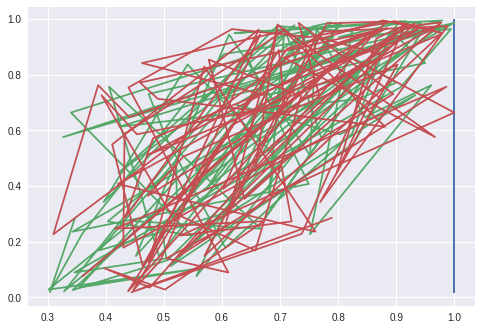

In [19]:
def computeErrorPercentage(featuresMatrix, model, labels):
    predictions = computeHypothesis(featuresMatrix, model)
    return np.sum(np.round(predictions)- labels)

plotModel(featuresMatrix, model, labels)